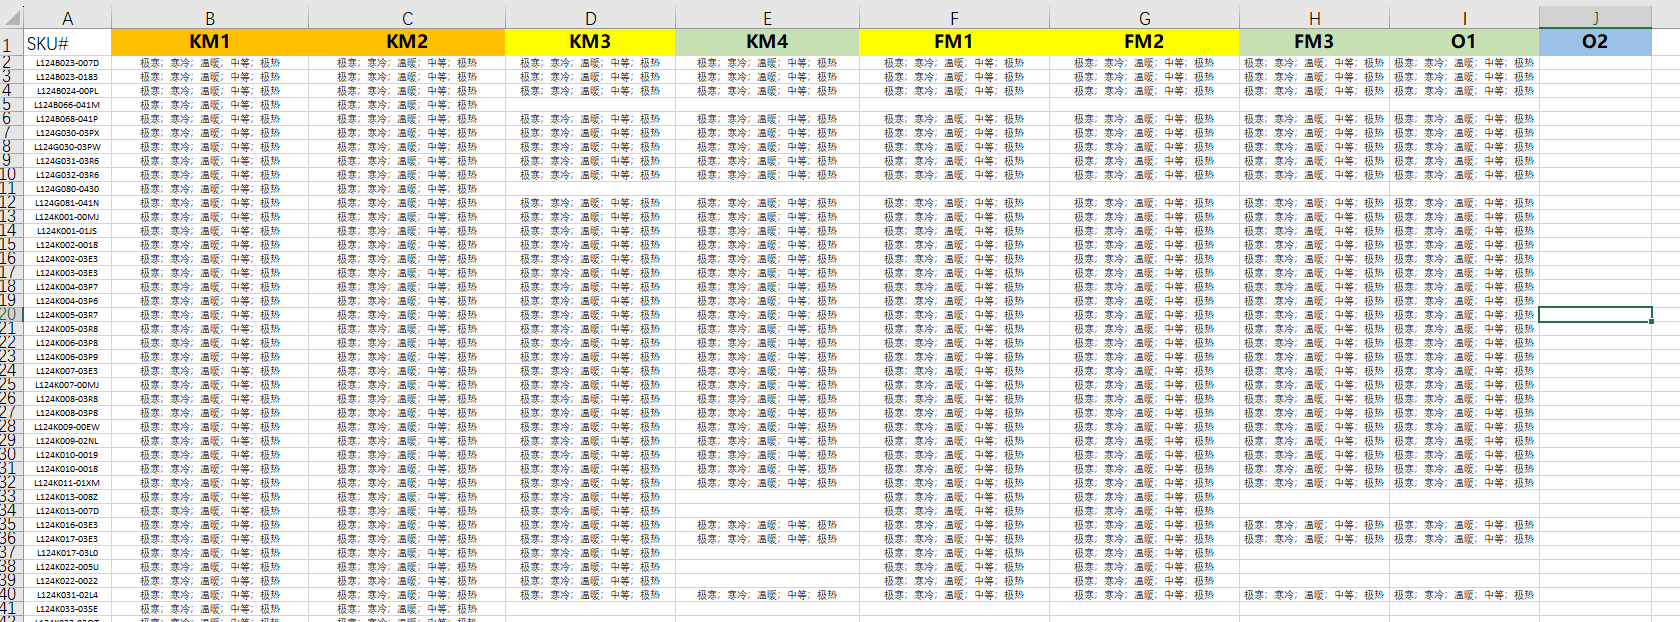

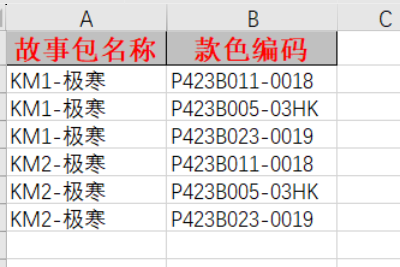

In [1]:
import pandas as pd

In [2]:
# 载入原始表

df = pd.read_excel('./横板转竖版.xlsx',sheet_name='Sheet1')
df.head()

,SKU#,KM1,KM2,KM3,KM4,FM1,FM2,FM3,O1,O2
0,L124B023-007D,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,NaN
1,L124B023-0183,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,NaN
2,L124B024-00PL,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,NaN
3,L124B066-041M,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L124B068-041P,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,极寒；寒冷；温暖；中等；极热,NaN


In [3]:
# 逆透视

df = df.melt(id_vars='SKU#')
df

,SKU#,variable,value
0,L124B023-007D,KM1,极寒；寒冷；温暖；中等；极热
1,L124B023-0183,KM1,极寒；寒冷；温暖；中等；极热
2,L124B024-00PL,KM1,极寒；寒冷；温暖；中等；极热
3,L124B066-041M,KM1,极寒；寒冷；温暖；中等；极热
4,L124B068-041P,KM1,极寒；寒冷；温暖；中等；极热
...,...,...,...
832,L124K020-00G2,O2,极寒；寒冷；温暖；中等；极热
833,P124K028-025C,O2,极寒；寒冷；温暖；中等；极热
834,P124K028-03ZJ,O2,极寒；寒冷；温暖；中等；极热
835,P124K029-03XF,O2,极寒；寒冷；温暖；中等；极热


In [4]:
# 剔除含有空值的行

df = df.dropna(axis=0, how='any')
df

,SKU#,variable,value
0,L124B023-007D,KM1,极寒；寒冷；温暖；中等；极热
1,L124B023-0183,KM1,极寒；寒冷；温暖；中等；极热
2,L124B024-00PL,KM1,极寒；寒冷；温暖；中等；极热
3,L124B066-041M,KM1,极寒；寒冷；温暖；中等；极热
4,L124B068-041P,KM1,极寒；寒冷；温暖；中等；极热
...,...,...,...
832,L124K020-00G2,O2,极寒；寒冷；温暖；中等；极热
833,P124K028-025C,O2,极寒；寒冷；温暖；中等；极热
834,P124K028-03ZJ,O2,极寒；寒冷；温暖；中等；极热
835,P124K029-03XF,O2,极寒；寒冷；温暖；中等；极热


In [5]:
# 一行转多行

df['value_processed'] = df['value'].str.split('；')
df = df.explode('value_processed')
df['story_package'] = df['variable'] + '-' + df['value_processed']
df_result = df[['SKU#','story_package']]
df_result

C:\Users\2000106552\AppData\Local\Temp\ipykernel_13164\3875392095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value_processed'] = df['value'].str.split('；')


,SKU#,story_package
0,L124B023-007D,KM1-极寒
0,L124B023-007D,KM1-寒冷
0,L124B023-007D,KM1-温暖
0,L124B023-007D,KM1-中等
0,L124B023-007D,KM1-极热
...,...,...
836,P124K029-03A7,O2-极寒
836,P124K029-03A7,O2-寒冷
836,P124K029-03A7,O2-温暖
836,P124K029-03A7,O2-中等
